In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 90.2MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.6MB/s]


In [9]:
# unzip
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
#using keras
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import MaxPooling2D, Flatten, Dense, Conv2D, BatchNormalization, Dropout

In [11]:
# concept of generators, whole dataset is divied into batches, helps in managing with large amounts of data
# generators, for image data loading
# https://keras.io/api/data_loading/image/
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# images are stored in numpy array and the values are from 0-255, we have to normalise it
# normalize
def process(image,label):
    image=tf.cast(image/255.0, tf.float32)
    return image, label

train_ds=train_ds.map(process)
validation_ds= validation_ds.map(process)

In [15]:
# cnn model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='VALID', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='VALID'))

model.add(Conv2D(64, kernel_size=(3,3), padding='VALID', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='VALID'))

model.add(Conv2D(128, kernel_size=(3,3), padding='VALID', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='VALID'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
# compile and execute
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 112ms/step - loss: 1.0898 - accuracy: 0.6101 - val_loss: 0.7417 - val_accuracy: 0.5928
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.5903 - accuracy: 0.6989 - val_loss: 0.7301 - val_accuracy: 0.6698
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5007 - accuracy: 0.7620 - val_loss: 0.5071 - val_accuracy: 0.7558
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4458 - accuracy: 0.7867 - val_loss: 0.4909 - val_accuracy: 0.7748
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3793 - accuracy: 0.8246 - val_loss: 0.4581 - val_accuracy: 0.7904
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3272 - accuracy: 0.8561 - val_loss: 0.4802 - val_accuracy: 0.7930
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2670 - accuracy: 0.8832 - val_loss: 0.6221 - val_ac

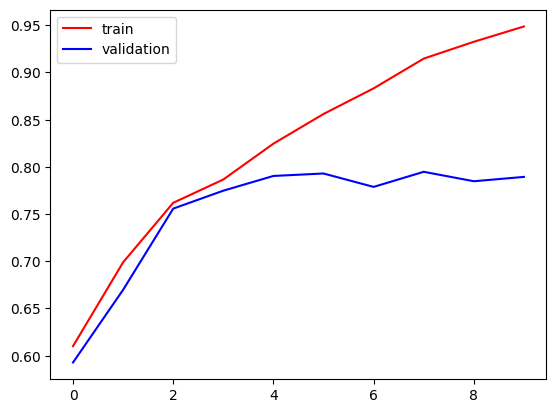

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

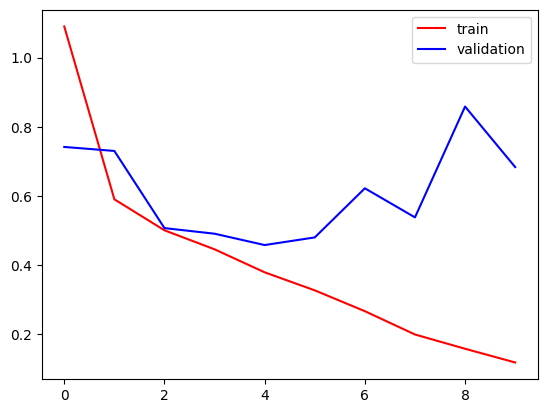

In [20]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()